# Segmentacion por Kmeans

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [10]:
original_image = cv2.imread(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap08_Segmentacion\Kmeans\imagenes\imagen1.jpeg")
img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

(524, 700, 3)


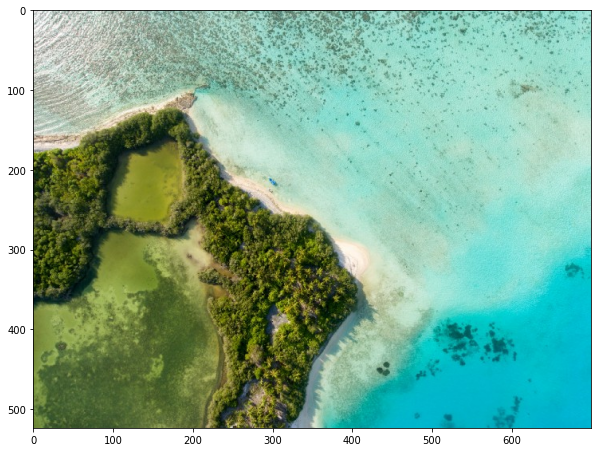

In [14]:
plt.figure(1,figsize=(10,10))
plt.imshow(img)
print(img.shape)

In [15]:
vectorized = img.reshape((-1,3))
print("Vectorized:",vectorized)
print("Exemplo:",vectorized[0]) # Componentes RGB de cada pixel de la imagen original
print("Shape:",vectorized.shape)

Vectorized: [[168 164 165]
 [222 218 219]
 [210 206 207]
 ...
 [  0 179 209]
 [  0 181 210]
 [  2 183 212]]
Exemplo: [168 164 165]
Shape: (366800, 3)


In [16]:
vectorized = np.float32(vectorized)
print("Vectorized:",vectorized)
print("Exemplo:",vectorized[0])

Vectorized: [[168. 164. 165.]
 [222. 218. 219.]
 [210. 206. 207.]
 ...
 [  0. 179. 209.]
 [  0. 181. 210.]
 [  2. 183. 212.]]
Exemplo: [168. 164. 165.]


In [17]:
criteria = (cv2.TERM_CRITERIA_EPS + # detener la iteración del algoritmo si se alcanza la precisión especificada,  épsilon .
            cv2.TERM_CRITERIA_MAX_ITER, # detiene el algoritmo después del número especificado de iteraciones,  max_iter .
            10, # maximo de iteraciones
            1.0 # epsilon
           )

In [18]:
K = 3
attempts = 10
ret,label,center = cv2.kmeans(vectorized, # muestra
                              K, # numero de cluster
                              None,
                              criteria, # criterio
                              attempts, # número de veces que se ejecuta el algoritmo usando diferentes etiquetas iniciales
                              cv2.KMEANS_PP_CENTERS # cómo se toman los centros iniciales
                             )

In [19]:
print("Ret:",ret)
print("Label:",label)
print("Center:",center) # RGB

Ret: 913795239.3727849
Label: [[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]
Center: [[ 84.08678    98.250275   44.17588  ]
 [160.0944    209.26521   190.27567  ]
 [  7.3115454 183.26581   193.5178   ]]


In [20]:
center = np.uint8(center)
print(center)

[[ 84  98  44]
 [160 209 190]
 [  7 183 193]]


In [22]:
print(label.flatten())
print(center[label.flatten()])

[1 1 1 ... 2 2 2]
[[160 209 190]
 [160 209 190]
 [160 209 190]
 ...
 [  7 183 193]
 [  7 183 193]
 [  7 183 193]]


In [23]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))
print(result_image.shape)

(524, 700, 3)


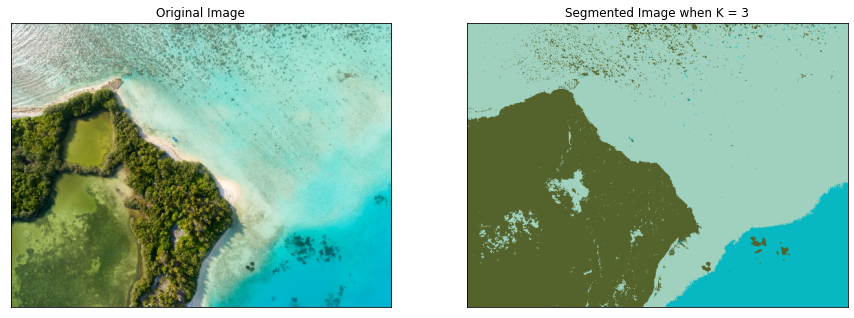

In [24]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()